In [4]:
import pandas as pd
import numpy as np

from Minu_Timeseries import timeseries_withdrawl
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import tensorflow as tf


In [3]:
Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_1'
df1 = timeseries_withdrawl(Excel_Name, Sheet_Name)

'''
Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_2'
df2 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_3'
df3 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_4'
df4 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_6'
df6 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_7'
df7 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_8'
df8 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_9'
df9 = timeseries_withdrawl(Excel_Name, Sheet_Name)

Excel_Name = 'ac_statement.xlsx'
Sheet_Name = 'DS_10'
df10 = timeseries_withdrawl(Excel_Name, Sheet_Name)
'''

"\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_2'\ndf2 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_3'\ndf3 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_4'\ndf4 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_6'\ndf6 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_7'\ndf7 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_8'\ndf8 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_9'\ndf9 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n\nExcel_Name = 'ac_statement.xlsx'\nSheet_Name = 'DS_10'\ndf10 = timeseries_withdrawl(Excel_Name, Sheet_Name)\n"

<AxesSubplot:xlabel='Date'>

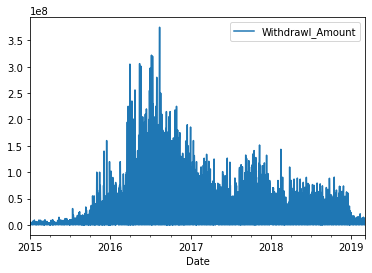

In [5]:
df1.plot()

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1525 entries, 2015-01-01 to 2019-03-05
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Withdrawl_Amount  1525 non-null   float64
dtypes: float64(1)
memory usage: 23.8 KB


In [7]:
#Scaling the Data between 0 to 1 :
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df1)

In [8]:
scaled

array([[0.        ],
       [0.01466682],
       [0.00586667],
       ...,
       [0.        ],
       [0.0128    ],
       [0.0311859 ]])

In [9]:
#Means Scaling has worked
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [10]:
len(scaled)

1525

In [11]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1067
test: 458


In [12]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
train

array([[0.        ],
       [0.01466682],
       [0.00586667],
       ...,
       [0.22885925],
       [0.15272269],
       [0.3136558 ]])

In [20]:
look_back = 25
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1041, 25)
(1041,)
(432, 25)
(432,)


In [21]:
# LSTM demands the formatting of the data in (Sample, #Features, Window_Size)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(1041, 25, 1)
(432, 25, 1)


In [23]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, 
# and an output layer that makes a single value prediction. 
# The default sigmoid activation function is used for the LSTM blocks. 
# The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network

batch_size = 1 #How many records we are pushing into the model
model = tf.keras.Sequential() #Defining Sequential Model

# 4 --> # Total #Neurons 
# (batch_size, look_back, 1) --> 1-D data we have passed, as there is only #passengers feature
# stateful=True means we are allowing the LSTM to hold the information nad forward the information to the next
model.add(LSTM(100, batch_input_shape=(batch_size, look_back, 1), stateful=True))

#Output Layer
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


model.fit(X_train, y_train, epochs=2, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/2
1041/1041 - 5s - loss: 0.0198
Epoch 2/2
1041/1041 - 5s - loss: 0.0182


In [25]:
import math
from sklearn.metrics import mean_squared_error

testPredict = model.predict(X_test, batch_size=batch_size)
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [26]:
y_test

array([[4.25000000e+07, 4.87326138e+07, 3.45000000e+07, 8.09066000e+05,
        3.50000000e+07, 5.94000000e+07, 4.35027232e+07, 4.03000000e+07,
        4.40015910e+07, 3.10000000e+07, 0.00000000e+00, 4.54000000e+07,
        4.35024718e+07, 7.05010692e+07, 4.11527200e+07, 7.02694132e+07,
        0.00000000e+00, 0.00000000e+00, 4.98137900e+07, 2.96289519e+07,
        6.26135945e+07, 4.70006692e+07, 4.99452663e+07, 3.75000000e+07,
        0.00000000e+00, 3.70000000e+07, 3.68872889e+07, 5.60000000e+07,
        6.00521389e+07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.65006120e+07, 3.84150049e+07, 2.88169613e+07, 4.66794008e+07,
        8.42656855e+07, 5.65000000e+07, 0.00000000e+00, 2.60000000e+07,
        6.40000000e+07, 4.06016790e+07, 6.23318480e+07, 6.86011846e+07,
        0.00000000e+00, 0.00000000e+00, 6.92987620e+07, 1.55000000e+07,
        4.89334234e+07, 1.43392930e+08, 8.84713191e+07, 5.60000000e+07,
        0.00000000e+00, 8.85000000e+06, 5.80296710e+07, 7.500158

In [27]:
testPredict

array([[59269668.],
       [50511372.],
       [47308896.],
       [46222280.],
       [46844530.],
       [50000612.],
       [50136056.],
       [47012196.],
       [45288070.],
       [45126172.],
       [45522610.],
       [46058268.],
       [48732860.],
       [47122976.],
       [45287076.],
       [42097630.],
       [43359060.],
       [43428810.],
       [48314900.],
       [52702410.],
       [51411140.],
       [49777570.],
       [45980988.],
       [44336436.],
       [44391460.],
       [45558964.],
       [49322040.],
       [49482588.],
       [48486756.],
       [46056740.],
       [43681924.],
       [46041136.],
       [47603504.],
       [47195400.],
       [42973016.],
       [36970452.],
       [32556686.],
       [29736814.],
       [27180098.],
       [29024960.],
       [36680920.],
       [43152390.],
       [45045076.],
       [47958200.],
       [49938590.],
       [50750452.],
       [55961580.],
       [60377130.],
       [56902060.],
       [55811736.],


In [80]:
import math
from sklearn.metrics import mean_squared_error

#Prediction done on Training Data
trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

#Prediction done on Testing Data
testPredict = model.predict(X_test, batch_size=batch_size)

# inversing MinMaxScaler for both predicted value and actual value
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])

testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 9365649.13 RMSE
Test Score: 24005460.62 RMSE


In [ ]:
29628268

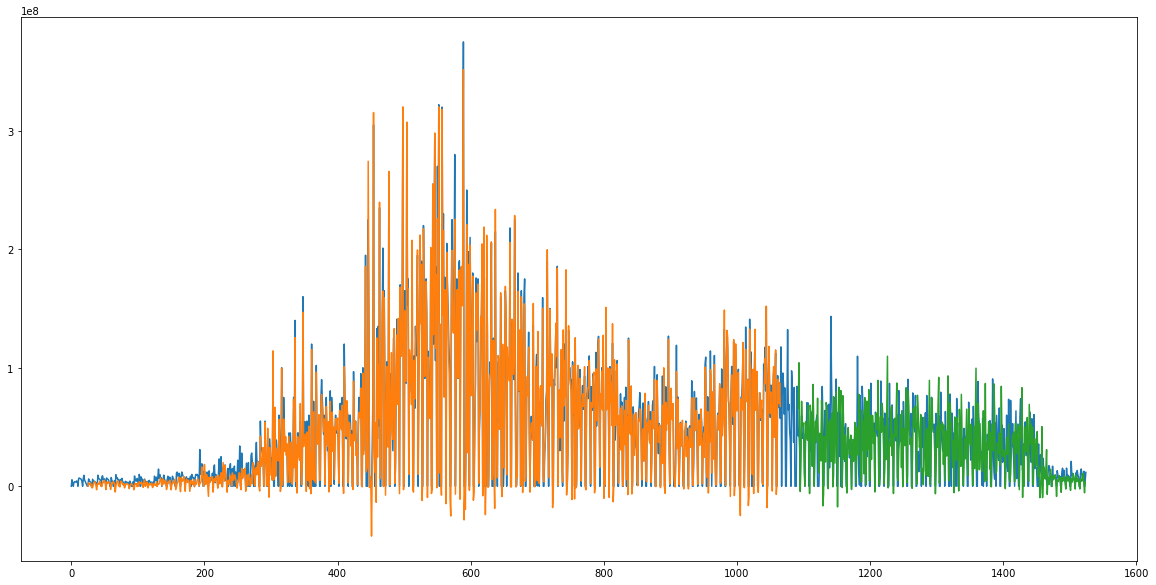

In [81]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()